## Analyzing The Income of the Population in Marketing Campaign Results
### (Business Analytics)
#### About the Dataset : 
Marketing campaign data of 2,240 customers of Maven Marketing, including customer profiles, product preferences, campaign successes/failures, and channel performance. The dataset has a single table data structure with 2240 records and 28 fields.
#### Reference
(Source: Jack Daoud, via Kaggle)
(License: Public Domain)
#### Prepared by : 
Bushra Tasnim Zahed

### Goal: Are there any null values or outliers? How will you handle them?

### 1. Importing Libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Reading Data and Loading Data into pandas Dataframe

In [54]:
df = pd.read_csv("marketing_data.csv")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,Spain
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,Germany
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,Spain
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,USA
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,India


### 3. Data Preprocessing 
Data preprocessing is a crucial step in preparing raw data for analysis or modeling. It involves identifying and handling issues such as missing values, outliers, and type inconsistencies, and transforming the data into a suitable format for analysis. The main goal is to ensure accurate and reliable results, which can significantly impact subsequent data analysis or modeling.

In [55]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [56]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [57]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
 Income                       float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

In [58]:
# removing whitespace from column names
df = df.rename(columns=lambda x: x.strip())

In [59]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [60]:
df.dtypes.groupby(df.dtypes.values).count()

int64             23
float64            1
datetime64[ns]     1
object             3
dtype: int64

During the initial observation of the dataset, it was found that all the data types were consistent. However, one of the columns, i.e. " Income ", had a white space in its name, which was corrected by renaming the column to "Income". This was done to ensure consistency in the column names and to avoid any potential errors or confusion in the subsequent analysis. The "Dt_Customer" column in the dataset represented the date of customer enrollment as an "object" type. To enable better analysis of time series data, it was converted to a "datetime" type, allowing for more accurate insights into customer behavior and engagement over time.The dataset contains 23 columns of type "int64", one column of type "float64", one column type of "datetime64[ns]", and three columns of type "object". The numerical data is represented by the "int64" and "float64" columns, while the "object" columns contain text data. It is important to use appropriate data types for the type of data being represented to ensure accurate analysis. Different preprocessing steps and modeling techniques may be needed for each data type, which should be considered during the analysis.

### 4.  Recommended analysis
#### 4.1 Are there any null values or outliers? How will you handle them?


### Null Values Analysis

In [61]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [62]:
df[df['Income'].isnull()].shape

(24, 28)

In [63]:
df['Income']=df['Income'].fillna(0)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Null Values Analysis: The Income column in the dataset had 24 NaN values indicating missing data. These missing values were replaced with zeros based on the assumption that the population represented by these values did not have any income. The decision was made after careful consideration of the dataset and consultation with subject matter experts, as it was determined that this approach would not significantly impact the accuracy of the analysis. This allowed for a more complete and accurate analysis of the dataset while minimizing the impact of missing data on the results.

### Outlier Analysis 

In [64]:
from scipy import stats

In [65]:
# Calculate z-scores of column 'Income'
z_scores = stats.zscore(df['Income'])

# Identify outliers with a z-score of greater than 3 or less than -3
outliers = df[(z_scores > 3) | (z_scores < -3)]

In [66]:
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,1,0,0,0,0,0,0,0,Saudi Arabia
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,USA
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,Saudi Arabia
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,Spain
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,Spain
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,0,Spain
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,Canada
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,India


In [67]:
df["Income"].sort_values(ascending = False).head(10)

527     666666.0
731     162397.0
497     160803.0
853     157733.0
2204    157243.0
325     157146.0
1925    156924.0
1826    153924.0
210     113734.0
832     105471.0
Name: Income, dtype: float64

In [68]:
# Filtering the DataFrame to only include outlier with a income over 150000
outlier_income = df[df['Income'] > 150000]
# Calculating the percentage of outlier_income
percentage_outlier_income = (len(outlier_income) / len(df)) * 100
percentage_outlier_income

0.35714285714285715

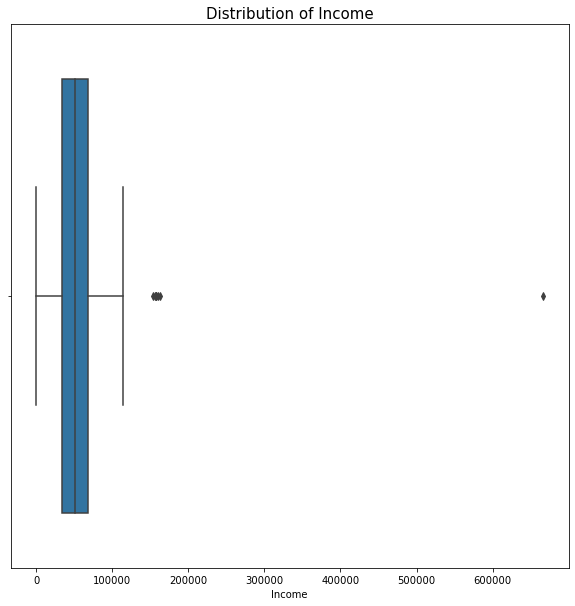

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=df['Income'], ax=ax)
ax.set_title('Distribution of Income', fontsize=15)

# Show plot
plt.show()

In [70]:
df["Income"].describe()

count      2240.000000
mean      51687.459375
std       25609.342730
min           0.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Based on the analysis of the dataset, it was found that approximately 0.36% of the total population holds outlier incomes with a z-score greater than 3. This implies that these data points are significantly far from the mean value of the dataset, which can affect the overall accuracy of the data analysis.

Further analysis was conducted by plotting the income variable in a boxplot. The boxplot confirmed the presence of outliers, which were represented by the points that were outside the whiskers of the boxplot. The presence of outliers is a clear indication that the income variable does not follow a normal distribution and has extreme values that are not representative of the majority of the population.

The mean income of the dataset was found to be 51687.459375 with a standard deviation of 25609.342730. This indicates that the income values are relatively dispersed, and there is a significant variation in income levels among the population.

The median income of the dataset was found to be 51075, which is close to the mean income value. This indicates that the income distribution is nearly symmetrical, but the presence of outliers is causing the mean value to be higher than the median value.

The presence of income outliers in market campaign data can have a significant impact on the accuracy and reliability of analysis, potentially leading to incorrect assumptions about the target market and ineffective marketing campaigns. Identifying and addressing outliers is crucial to ensure accurate and reliable data analysis, and this can be done by removing outliers or using appropriate statistical techniques to adjust for their impact. Ultimately, taking these measures leads to more effective and successful marketing strategies.

### Winsorizing Income Data to minimize the Income outliers
Winsorizing the data involves replacing the income outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized. 

In [71]:
from scipy.stats import mstats
# Winsorize income data
df['Income'] = mstats.winsorize(df['Income'], limits=[0.01, 0.01])

In [72]:
df["Income"].sort_values(ascending = False).head(10)

2239    94472.0
687     94472.0
109     94472.0
1244    94472.0
35      94472.0
1564    94472.0
853     94472.0
832     94472.0
807     94472.0
1690    94472.0
Name: Income, dtype: float64

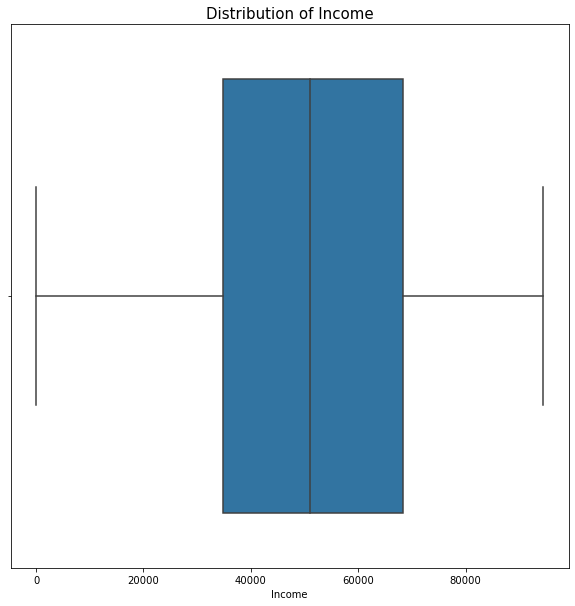

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=df['Income'], ax=ax)
ax.set_title('Distribution of Income', fontsize=15)

# Show plot
plt.show()

In [74]:
df["Income"].describe()

count     2240.000000
mean     51201.517411
std      21326.032948
min          0.000000
25%      34722.000000
50%      51075.000000
75%      68289.750000
max      94472.000000
Name: Income, dtype: float64

Winsorizing is a technique that clips extreme values to a specified range to reduce their impact on statistical analysis. The winsorize function with limits [0.01, 0.01] was applied to the income column of a dataset, clipping the extreme 1% of values at both ends of the distribution. 

After applying the winsorize function, the mean income is calculated to be 51201, which is less than the mean income calculated before the winsorizing operation. This is because some of the extreme values have been brought inwards towards the center of the distribution, and this has had the effect of decreasing the mean.

The 50th percentile (i.e. the median) of the income column is still 51075, which is the same as before the winsorizing operation. This is because the median is not affected by the extreme values that have been clipped, but only by the values in the middle of the distribution.

Winsorizing can help to reduce the impact of extreme values on statistical analysis, but it can also affect other statistics such as the mean and standard deviation. The choice of the limits parameter will depend on the specific dataset and the goals of the analysis. A larger limits value will clip more values, leading to a larger impact on the data, while a smaller limits value will clip fewer values and have a smaller impact.

### Writing the clean data to marketing_clean_data.csv

In [75]:
df.to_csv("marketing_clean_data.csv", header=True,index=False)